In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [3]:
columns_names= ['MPG', 'Cylinders','Displacement','Housepower','Weight','Acceleration','Model Year', 'Origin']
df = pd.read_csv(url,names=columns_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
df.info()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [4]:
# drop the NA rows
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

NameError: name 'df' is not defined

In [ ]:
df.sample(15)

,MPG,Cylinders,Displacement,Housepower,Weight,Acceleration,Model Year,Origin
130,25.0,4,140.0,75.0,2542.0,17.0,74,1
329,29.8,4,89.0,62.0,1845.0,15.3,80,2
224,20.5,6,231.0,105.0,3425.0,16.9,77,1
35,19.0,6,250.0,88.0,3302.0,15.5,71,1
273,17.0,6,163.0,125.0,3140.0,13.6,78,2
237,30.0,4,97.0,67.0,1985.0,16.4,77,3
29,27.0,4,97.0,88.0,2130.0,14.5,71,3
42,13.0,8,400.0,170.0,4746.0,12.0,71,1
68,12.0,8,350.0,160.0,4456.0,13.5,72,1
177,22.0,4,121.0,98.0,2945.0,14.5,75,2


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8, random_state=1)
train_stats = df_train.describe().transpose()
train_stats
    


,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
Housepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
Model Year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [ ]:
numeric_column_names = [
    'Cylinders', 'Displacement', 'Housepower', 'Weight', 'Acceleration'
]
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name]-mean)/std
    df_test_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name]-mean)/std

df_train_norm.tail()

/tmp/ipykernel_21766/4076235819.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.8243028   0.3511267  -0.8243028  -0.8243028  -0.8243028   1.52655621
  0.3511267  -0.8243028  -0.8243028  -0.8243028   0.3511267  -0.8243028
  0.3511267   1.52655621  1.52655621  1.52655621  0.3511267   1.52655621
 -0.8243028   0.3511267   1.52655621 -0.8243028  -0.8243028   0.3511267
 -0.8243028  -0.8243028  -0.8243028   0.3511267  -0.8243028   1.52655621
  0.3511267  -0.8243028   0.3511267  -0.8243028  -0.8243028   1.52655621
 -0.8243028   1.52655621  1.52655621 -0.8243028  -0.8243028  -0.8243028
 -0.8243028   0.3511267  -0.8243028   1.52655621 -0.8243028  -0.8243028
  1.52655621 -0.8243028  -0.8243028  -0.8243028   1.52655621  1.52655621
  0.3511267   0.3511267   1.52655621 -0.8243028  -0.8243028   1.52655621
  1.52655621 -0.8243028  -0.8243028   0.3511267   1.52655621 -0.8243028
  0.3511267  -0.8243028   1.52655621  1.526556

,MPG,Cylinders,Displacement,Housepower,Weight,Acceleration,Model Year,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


In [ ]:
#  Bucketing: if year<73 bucket0 elif year>= 73 and <76 bucket1 elif year>=79 and <79 bucket2 elif bucket3
import torch
from torch import nn as nn
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries=boundaries, right=True)
v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)
numeric_column_names.append('Model Year Bucketed')

In [ ]:
df_test_norm.head()

,MPG,Cylinders,Displacement,Housepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
81,23.0,NaN,NaN,NaN,NaN,NaN,72,3,0
165,29.0,NaN,NaN,NaN,NaN,NaN,75,3,1
351,32.4,NaN,NaN,NaN,NaN,NaN,81,3,3
119,19.0,NaN,NaN,NaN,NaN,NaN,73,2,1
379,38.0,NaN,NaN,NaN,NaN,NaN,82,3,3


In [ ]:
df_train_norm.head()

,MPG,Cylinders,Displacement,Housepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
334,27.2,-0.824303,-0.530922,-0.499214,-0.555264,-0.001641,81,1,3
258,18.6,0.351127,0.345625,0.186457,0.776338,1.099115,78,1,2
139,29.0,-0.824303,-0.891280,-0.525586,-0.874613,0.291894,74,2,1
310,37.2,-0.824303,-1.008153,-1.000281,-1.110294,0.255202,80,3,3
349,33.0,-0.824303,-0.823104,-0.762934,-0.908786,-0.552019,81,2,3


In [ ]:
# Preprocessing with unordered categorical feature. There are two ways to work with categorical datasets
# 1, One hot encoding
# 2. Embedding

# Here, using one hot encoding
from torch.nn.functional import one_hot
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(df_train_norm['Origin'].values)%total_origin)
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded],1).float()
origin_encoded = one_hot(torch.from_numpy(df_test_norm['Origin'].values)%total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()



In [ ]:
x_train[:5],x_test[:5] 

(tensor([[-8.2430e-01, -5.3092e-01, -4.9921e-01, -5.5526e-01, -1.6412e-03,
           3.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00],
         [ 3.5113e-01,  3.4562e-01,  1.8646e-01,  7.7634e-01,  1.0991e+00,
           2.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00],
         [-8.2430e-01, -8.9128e-01, -5.2559e-01, -8.7461e-01,  2.9189e-01,
           1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00],
         [-8.2430e-01, -1.0082e+00, -1.0003e+00, -1.1103e+00,  2.5520e-01,
           3.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
         [-8.2430e-01, -8.2310e-01, -7.6293e-01, -9.0879e-01, -5.5202e-01,
           3.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]),
 tensor([[nan, nan, nan, nan, nan, 0., 1., 0., 0.],
         [nan, nan, nan, nan, nan, 1., 1., 0., 0.],
         [nan, nan, nan, nan, nan, 3., 1., 0., 0.],
         [nan, nan, nan, nan, nan, 1., 0., 0., 1.],
         [nan, nan, nan, nan, nan, 3., 1., 0., 0.]]))

In [ ]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

In [ ]:
y_train[:15], y_test[:15]

(tensor([27.2000, 18.6000, 29.0000, 37.2000, 33.0000, 13.0000, 22.4000, 44.6000,
         27.4000, 31.0000, 24.0000, 28.0000, 17.6000, 15.0000, 11.0000]),
 tensor([23.0000, 29.0000, 32.4000, 19.0000, 38.0000, 33.5000, 26.0000, 14.0000,
         28.0000, 32.4000, 21.5000, 41.5000, 17.0000, 33.5000, 29.0000]))

### Training a DNN regression Model

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
# Model with 2 fully connected layers
hidden_units = [8,4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

In [ ]:
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# Defining MSE loss function
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

num_epochs = 200
log_epochs=20
for epoch in range(num_epochs):
    loss_hist_train=0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss ' f"{loss_hist_train/len(train_dl): .4f}")



Epoch 0 Loss  555.7473
Epoch 20 Loss  8.9140
Epoch 40 Loss  8.3332
Epoch 60 Loss  8.3869
Epoch 80 Loss  7.8625
Epoch 100 Loss  7.2073
Epoch 120 Loss  7.1587
Epoch 140 Loss  7.1894
Epoch 160 Loss  6.6871
Epoch 180 Loss  7.2468


In [ ]:
with torch.no_grad():
    pred = model(x_test.float())[:,0]
    loss = loss_fn(pred,y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred,y_test).item():.4f}')

Test MSE: nan
Test MAE: nan


In [ ]:
# Check for NaN values in x_test and y_test
if torch.isnan(x_test).any() or torch.isnan(y_test).any():
    print("NaN values detected in x_test or y_test")

NaN values detected in x_test or y_test


In [ ]:
x_test

tensor([[nan, nan, nan, nan, nan, 0., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 1., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 3., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 1., 0., 0., 1.],
        [nan, nan, nan, nan, nan, 3., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 2., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 0., 0., 0., 1.],
        [nan, nan, nan, nan, nan, 1., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 0., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 3., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 3., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 3., 0., 0., 1.],
        [nan, nan, nan, nan, nan, 3., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 2., 1., 0., 0.],
        [nan, nan, nan, nan, nan, 3., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 0., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 3., 0., 1., 0.],
        [nan, nan, nan, nan, nan, 3., 0., 0., 1.],
        [nan, nan, nan, nan, nan, 0., 0., 1., 0.],
        [nan, nan, nan, nan, na

In [ ]:
y_test

tensor([23.0000, 29.0000, 32.4000, 19.0000, 38.0000, 33.5000, 26.0000, 14.0000,
        28.0000, 32.4000, 21.5000, 41.5000, 17.0000, 33.5000, 29.0000, 17.0000,
        36.0000, 43.4000, 14.0000, 20.0000, 26.0000, 16.0000, 15.0000, 15.5000,
        15.0000, 18.5000, 31.5000, 20.0000, 21.0000, 30.0000, 19.2000, 24.5000,
        13.0000, 22.0000, 20.5000, 17.5000, 18.0000, 19.2000, 38.0000, 27.0000,
        15.5000, 14.0000, 20.0000, 19.0000, 18.0000, 15.0000, 11.0000, 31.0000,
        22.0000, 13.0000, 17.0000, 20.5000, 28.0000, 32.0000, 29.8000, 18.0000,
        28.8000, 21.0000, 33.5000, 36.1000, 38.0000, 28.0000, 37.0000, 19.9000,
        22.5000, 19.0000, 19.0000, 14.0000, 31.9000, 12.0000, 37.0000, 19.2000,
        13.0000, 34.3000, 26.0000, 35.7000, 14.0000, 13.0000, 13.0000])

### Next approach


In [ ]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Origin']

df = pd.read_csv(url, names = col_names, na_values = '?', comment = '\t', sep = ' ', skipinitialspace = True)

In [ ]:

df.describe()



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:


df = df.dropna()
df = df.reset_index(drop = True)


In [ ]:
len(df)

392

In [ ]:


from sklearn import model_selection

df_train, df_test = model_selection.train_test_split(df, train_size = 0.8, random_state = 42)
train_stats = df_train.describe().transpose()

train_stats



,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.599361,7.956255,9.0,17.0,23.0,30.0,46.6
Cylinders,313.0,5.482428,1.700446,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,195.517572,103.766567,70.0,105.0,151.0,302.0,455.0
Horsepower,313.0,104.594249,38.283669,46.0,76.0,95.0,129.0,230.0
Weight,313.0,2986.124601,841.133957,1613.0,2234.0,2855.0,3645.0,5140.0
Acceleration,313.0,15.544089,2.817864,8.0,13.5,15.5,17.3,24.8
Model_Year,313.0,76.207668,3.630136,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.555911,0.807163,1.0,1.0,1.0,2.0,3.0


In [ ]:

numeric_cols = ['Cylinders', 'Displacement','Horsepower','Weight','Acceleration']

#Let's make a copy of original dataframe, so we dont affect original data
df_train_norm , df_test_norm = df_train.copy(), df_test.copy()

for col in numeric_cols:
  mean = train_stats.loc[col,'mean']
  std = train_stats.loc[col,'std']

  df_train_norm.loc[:, col] = ( df_train_norm.loc[:, col] - mean) /std
  df_test_norm.loc[:, col] = ( df_test_norm.loc[:, col] - mean) /std 


/tmp/ipykernel_21766/3961073260.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.30437417 -0.87178774  0.30437417  1.48053607 -0.87178774  1.48053607
 -0.87178774  0.30437417  0.30437417  1.48053607  0.30437417 -0.87178774
  0.30437417 -0.87178774 -0.87178774  0.30437417  0.30437417 -0.87178774
  1.48053607 -0.87178774  0.30437417  1.48053607  0.30437417  1.48053607
 -0.87178774 -0.87178774 -0.87178774 -0.87178774 -0.87178774 -0.87178774
  1.48053607 -0.87178774 -0.87178774 -0.87178774 -0.87178774 -0.87178774
 -0.87178774  1.48053607  0.30437417 -0.87178774  0.30437417 -0.87178774
  0.30437417  0.30437417 -0.87178774 -0.87178774 -0.87178774 -0.87178774
 -0.87178774  0.30437417 -0.87178774 -0.87178774 -0.87178774 -0.87178774
 -0.87178774  1.48053607 -0.87178774 -0.87178774 -0.87178774  0.30437417
  1.48053607  1.48053607  0.30437417 -0.87178774 -0.87178774 -0.87178774
 -0.87178774 -0.87178774  1.48053607  0.

/tmp/ipykernel_21766/892323753.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_21766/892323753.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_21766/892323753.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_21766/892323753.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_21766/892323753.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


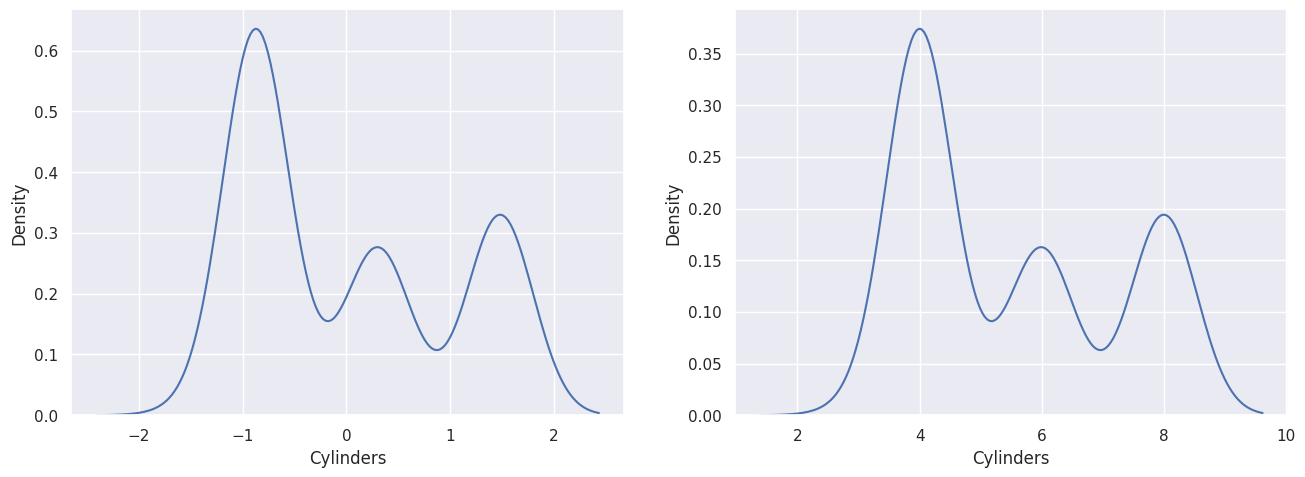

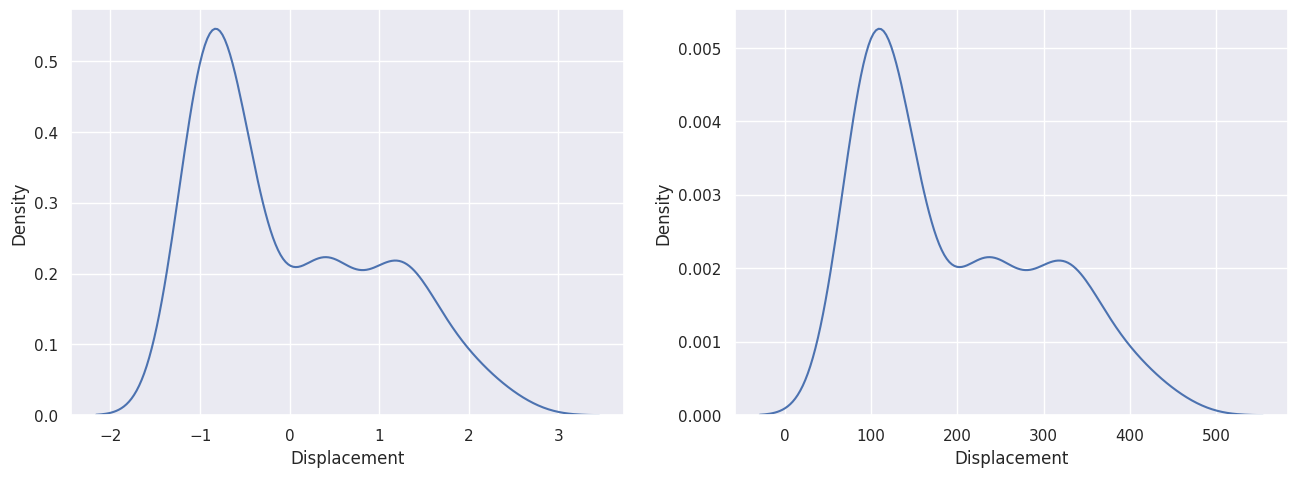

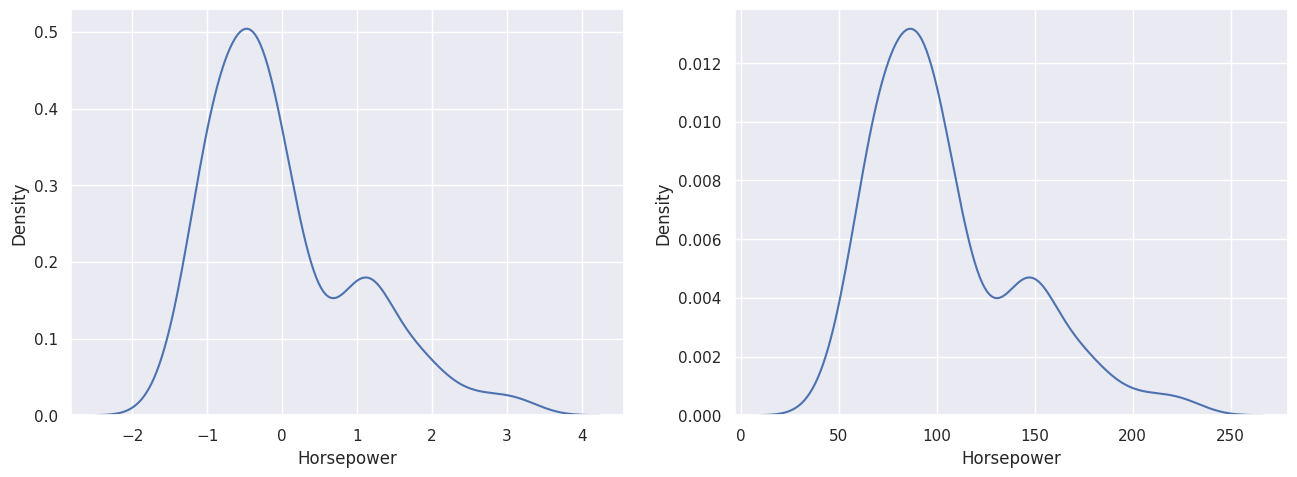

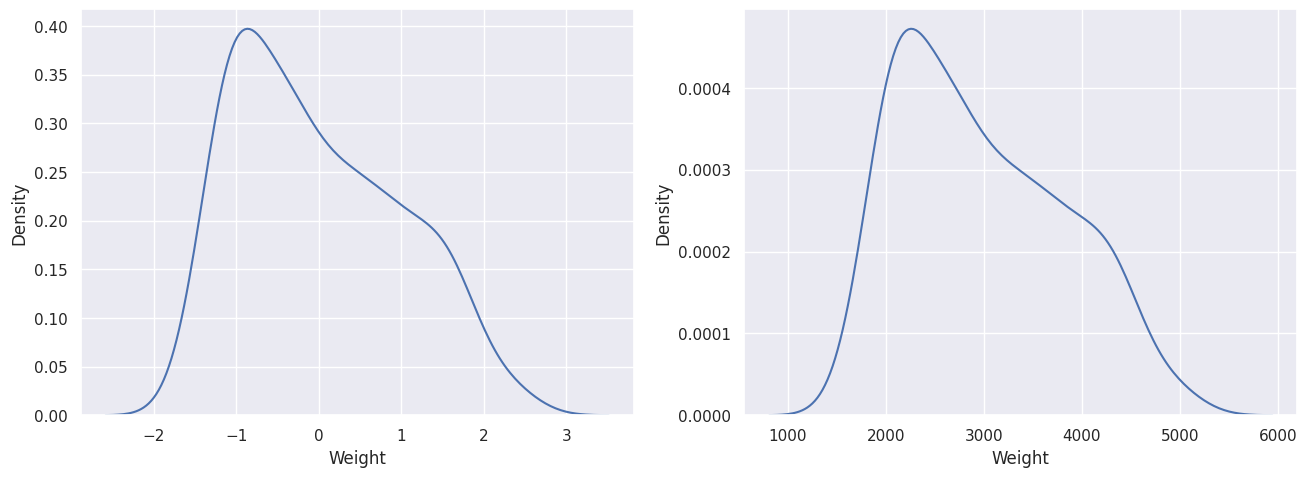

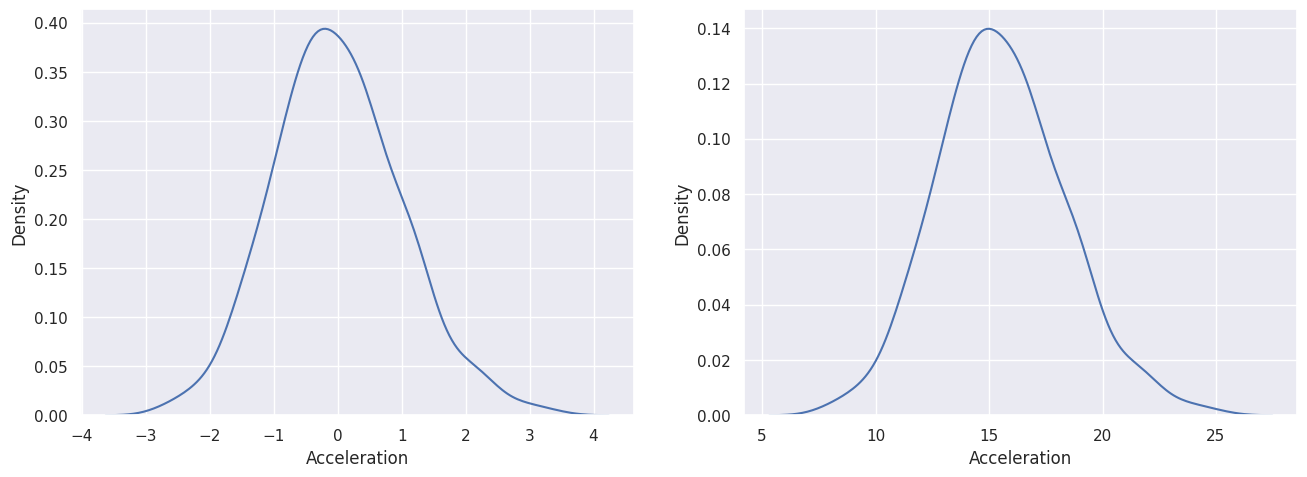

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

sns.set(rc={'figure.figsize':(15.7,5.27)})

for col in numeric_cols:

  fig, ax =plt.subplots(1,2)
  sns.kdeplot(data=df_train_norm, x=col, ax=ax[0])
  sns.kdeplot(data=df_train, x=col, ax=ax[1])
  fig.show()

In [ ]:
import torch

ranges = torch.tensor([73, 76, 79])
values = torch.tensor(df_train_norm['Model_Year'].values)
df_train_norm['Model_Year_Bins'] = torch.bucketize(values, ranges, right = True)

test_values = torch.tensor(df_test_norm['Model_Year'].values)
df_test_norm['Model_Year_Bins'] = torch.bucketize(test_values, ranges, right = True)

numeric_cols.append('Model_Year_Bins')


In [ ]:

from torch.nn.functional import one_hot

n_categories = len(set(df_train_norm['Origin'])) #get the number of categoriee

origin_encoded = one_hot(torch.from_numpy(df_train_norm['Origin'].values % n_categories))
x_train_numeric = torch.tensor(df_train_norm[numeric_cols].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()

#smae thing on test set
origin_encoded = one_hot(torch.from_numpy(df_test_norm['Origin'].values % n_categories))
x_test_numeric = torch.tensor(df_test_norm[numeric_cols].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()



In [ ]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(x_train, y_train)
batch_size = 16
torch.manual_seed(42)

train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [ ]:
import torch.nn as nn

hidden_units = [8,4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
  layer = nn.Linear(input_size, hidden_unit)
  all_layers.append(layer)
  all_layers.append(nn.ReLU())
  input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

for epoch in range(num_epochs):
  loss_hist_train = 0
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:,0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_train += loss.item()
  
  if epoch % log_epochs == 0:
    print(f'Epoch {epoch} Loss {loss_hist_train/len(train_dl):.4f}')

Epoch 0 Loss 606.2211
Epoch 20 Loss 8.5781
Epoch 40 Loss 8.4453
Epoch 60 Loss 8.3617
Epoch 80 Loss 8.3206
Epoch 100 Loss 8.3485
Epoch 120 Loss 8.1929
Epoch 140 Loss 8.1415
Epoch 160 Loss 8.0864
Epoch 180 Loss 8.0272


In [ ]:
with torch.no_grad():
  pred = model(x_test.float())[:,0]
  loss = loss_fn(pred, y_test)
  print(f'Test MSE: {loss.item():.4f}')
  print(f'Test MAE: {nn.L1Loss()(pred,y_test).item():.4f}')

Test MSE: 7.6247
Test MAE: 2.0713
